# SOC Baseline LEAFs
This notebook documents the generation of currently available SOC LEAFs for SBTN Land v2 Land Quality Target. Full documentaion of the SOC model can be found on [SOC_Documentation](../documentation/SOC_Documentation.md) and an example of how to generate new crop SOC LEAFs on [SOC_LEAF_Example](../examples/SOC_LEAF_Example.ipynb).

Here, LEAFs are generated for 1) annual crops, 2) permanent crops, and 3) forest & grassland land uses. As model generate annual outputs, only the end year is preserved, in this case 2030.

## Step 1 - Data Gathering and Preparation
As explained in SOC Documentation, several data layers need to be gathered.

### 1.1 - Soil & Weather
Precipitation and air temperature data have been downloaded and processed. It be found under [data/](../data/). SoilGrids data have been downloaded and processed into UHTH zones in the needed format and is also available in the same folder.

**🚧 TODO: Update reference 🚧**
This data is too large to be be hosted in a github repository. Instructions into how to download it can be found on XXX

### 1.2 - Commodity Data
#### 1.2.1 - Land use
Land use layers have been adapted from Morais, Teixeria & Domingos (2019) and can be found under [data/land_use/](../data/land_use/). These layers include annual & permanent crops, forestry, and grasslands.

#### 1.2.2 - Annual & Permanent Crops
##### 1.2.2.1 - Yields
Commodity yield input data from FAO has already been summarized and can be found at [data/crops/fao_crop_yields_1423.csv](../data/crops/fao_crop_yields_1423.csv) file. The needed SPAM data has been downloaded into [data/crops/spam2020V2r0_global_yield](data/crops/spam2020V2r0_global_yield) folder. For each run of the RothC model, yields per pixel are stochastically calculated using SPAM and FAO data by averaging 100 normal distribution draws, using the standard deviation per country reported by FAO for each commodity.

##### 1.2.2.2 -Irrigation, crop potential evapotranspiration, and plant cover
Potential evapotranspiration, and thus irrigation, as well as plant cover can are calculated using prepare_crop_data_irrigation_plantcover for a single crop or  `cropcalcs.prepare_crop_scenarios_PET_PlantCover_only` for a series of crops and land management options. All needed data can be found on [data/crops](../data/crops) folder with the exception of SPAM rasters which should be indepedently downloaded.

Calcualtions are performed as follows:

In [ ]:
# Loading modules
import sbtn_leaf.RothC_Raster as rothC
from sbtn_leaf.paths import data_path, LEAFs_dir
import sbtn_leaf.map_plotting as maplot
import sbtn_leaf.cropcalcs as cropcalcs

import importlib
import polars as pl
import geopandas as gpd
import sbtn_leaf.map_calculations as mc
import matplotlib.pyplot as plt

Could not determine dtype for column 1, falling back to string


##### Annual Crops

One crop example

In [5]:
output_crop_folder = "../data/crops/rothc_support"

In [6]:
# Needed filepaths
lu_filepath = "../data/land_use/lu_Irrigated_Maize_residues_left_on_the_field.tif"

In [7]:
# Preparing crop data
cropcalcs.prepare_crop_data_irrigation_plantcover(
    crop_name = "Maize",
    crop_type= "annual",
    crop_practice_string = "irr",
    lu_data_path = lu_filepath,
    output_data_folder = output_crop_folder,
    all_new_files=True
)

Creating PET raster...


C:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\src\sbtn_leaf\data_loader.py:216: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  table = pl.DataFrame(THERMAL_CLIMATE_ROWS, schema=["id", "TC_Name", "TC_Group"])
Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 72.85it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00,  6.10it/s]


PET calculation completed for crop 'Maize' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Maize_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Maize_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Maize, irr!!!


All permanent crops included

In [3]:
# Filepath
annual_crop_rothc_prep_fp = data_path("crops", "rothc_support", "annual_crop_rothc_dataprep_inventory.csv")

In [4]:
# Preparing rothc needed files
annuals_unique_data_prepared = cropcalcs.prepare_crop_scenarios_PET_PlantCover_only(annual_crop_rothc_prep_fp)

Creating a unique list of rasters with different land use maps...

Preparing irrigation and plant cover data for Barley, irr_ron
Creating PET raster...


C:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\src\sbtn_leaf\data_loader.py:216: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  table = pl.DataFrame(THERMAL_CLIMATE_ROWS, schema=["id", "TC_Name", "TC_Group"])


PET calculation completed for crop 'Barley' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Barley_irr_ron_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Barley_irr_ron_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Barley, irr_ron!!!
Next!

Preparing irrigation and plant cover data for Barley, irr_roff
Creating PET raster...
PET calculation completed for crop 'Barley' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Barley_irr_roff_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Barley_irr_roff_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Barley, irr_roff!!!
Next!

Preparing irrigation and plant cover data for Cabbage, irr
Creating PET raster...
PET calculation completed for crop 'Cabbage' succesfully.
Creating irrigation raster...
Irr

Checking which scenarios were created...

In [7]:
annuals_unique_data_prepared.sort_values(by=["crop_name", "crop_practice_string"])

,crop_name,crop_type,crop_practice_string,lu_path,pet_path,irr_path,plantcover_path
1,Barley,annual,irr_roff,../data/land_use/lu_Irrigated_Barley_residues_...,..\data\crops\rothc_support\Barley_irr_roff_pe...,..\data\crops\rothc_support\Barley_irr_roff_ir...,..\data\crops\rothc_support\Barley_irr_roff_pc...
0,Barley,annual,irr_ron,../data/land_use/lu_Irrigated_Barley_residues_...,..\data\crops\rothc_support\Barley_irr_ron_pet...,..\data\crops\rothc_support\Barley_irr_ron_irr...,..\data\crops\rothc_support\Barley_irr_ron_pc_...
22,Barley,annual,rf_roff,../data/land_use/lu_Rainfed_Barley_residues_re...,..\data\crops\rothc_support\Barley_rf_roff_pet...,None,..\data\crops\rothc_support\Barley_rf_roff_pc_...
21,Barley,annual,rf_ron,../data/land_use/lu_Rainfed_Barley_residues_le...,..\data\crops\rothc_support\Barley_rf_ron_pet_...,None,..\data\crops\rothc_support\Barley_rf_ron_pc_m...
2,Cabbage,annual,irr,../data/land_use/lu_Irrigated_Cabbages.tif,..\data\crops\rothc_support\Cabbage_irr_pet_mo...,..\data\crops\rothc_support\Cabbage_irr_irr_mo...,..\data\crops\rothc_support\Cabbage_irr_pc_mon...
3,Carrot,annual,irr,../data/land_use/lu_Irrigated_Carrots.tif,..\data\crops\rothc_support\Carrot_irr_pet_mon...,..\data\crops\rothc_support\Carrot_irr_irr_mon...,..\data\crops\rothc_support\Carrot_irr_pc_mont...
4,Cotton,annual,irr,../data/land_use/lu_Irrigated_cotton.tif,..\data\crops\rothc_support\Cotton_irr_pet_mon...,..\data\crops\rothc_support\Cotton_irr_irr_mon...,..\data\crops\rothc_support\Cotton_irr_pc_mont...
23,Cotton,annual,rf,../data/land_use/lu_Rainfed_cotton.tif,..\data\crops\rothc_support\Cotton_rf_pet_mont...,None,..\data\crops\rothc_support\Cotton_rf_pc_month...
35,Groundnut,annual,irr,../data/land_use/lu_Irrigated_Groundnuts.tif,..\data\crops\rothc_support\Groundnut_irr_pet_...,..\data\crops\rothc_support\Groundnut_irr_irr_...,..\data\crops\rothc_support\Groundnut_irr_pc_m...
6,Maize,annual,irr_roff,../data/land_use/lu_Irrigated_Maize_residues_r...,..\data\crops\rothc_support\Maize_irr_roff_pet...,..\data\crops\rothc_support\Maize_irr_roff_irr...,..\data\crops\rothc_support\Maize_irr_roff_pc_...


Saving it to create easily the next set of data for rothC runs...

In [8]:
annuals_unique_data_prepared.to_csv("../data/crops/rothc_support/annual_crops_data_path.csv", sep=";", index=False)

##### Permanent Crops

One crop example

In [ ]:
# Needed filepaths
lu_filepath = "../data/land_use/lu_Irrigated_Coffee.tif"
spam_coffee_all = "../data/crops/spam2020V2r0_global_yield/spam2020_V2r0_global_Y_COFF_A.tif"
spam_coffee_irr = "../data/crops/spam2020V2r0_global_yield/spam2020_V2r0_global_Y_COFF_I.tif"
spam_coffee_rain = "../data/crops/spam2020V2r0_global_yield/spam2020_V2r0_global_Y_COFF_R.tif"

In [ ]:
cropcalcs.prepare_crop_data_irrigation_plantcover(
    crop_name = "Coffee",
    crop_type= "permanent",
    crop_practice_string = "irr",
    lu_data_path = lu_filepath,
    output_data_folder = output_crop_folder,
    all_new_files=True
)

Creating PET raster...


Precomputing Kc curves for group: 100%|██████████| 6/6 [00:00<00:00, 68.92it/s]


    Precomputing Kc curve for group: Tropics
    Precomputing Kc curve for group: Subtropics summer rainfall
    Precomputing Kc curve for group: Subtropics winter rainfall
    Precomputing Kc curve for group: Oceanic temperate
    Precomputing Kc curve for group: Sub-continental temperate and continental temperate
    Precomputing Kc curve for group: Sub-continental boreal, continental boreal and polar/arctic


Applying Kc to thremal groups: 100%|██████████| 6/6 [00:00<00:00, 18.17it/s]


PET calculation completed for crop 'Coffee' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Coffee_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Coffee_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Coffee, irr!!!


All permanent crops included

In [25]:
permanent_crop_rothc_prep_fp = data_path("crops", "rothc_support", "permanent_crop_rothc_dataprep_inventory.csv")

In [26]:
perm_unique_data_prepared = cropcalcs.prepare_crop_scenarios_PET_PlantCover_only(permanent_crop_rothc_prep_fp)

Creating a unique list of rasters with different land use maps...

Preparing irrigation and plant cover data for Apple, irr
Creating PET raster...
PET calculation completed for crop 'Apple' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Apple_irr_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Apple_irr_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Apple, irr!!!
Next!

Preparing irrigation and plant cover data for Banana, irr
Creating PET raster...
PET calculation completed for crop 'Banana' succesfully.
Creating irrigation raster...
Irrigation raster saved to ..\data\crops\rothc_support\Banana_irr_irr_monthly.tif
Creating plant cover raster...
Plant cover raster saved to ..\data\crops\rothc_support\Banana_irr_pc_monthly.tif
Irrigation, PET, and plant cover rasters created for Banana, irr!!!
Next!

Preparing irrigation and plant cover data for Cocoa, irr
Creat

Storing data path created

In [27]:
perm_unique_data_prepared

,crop_name,crop_type,crop_practice_string,lu_path,pet_path,irr_path,plantcover_path
0,Apple,permanent,irr,../data/land_use/lu_Irrigated_Apples.tif,..\data\crops\rothc_support\Apple_irr_pet_mont...,..\data\crops\rothc_support\Apple_irr_irr_mont...,..\data\crops\rothc_support\Apple_irr_pc_month...
1,Banana,permanent,irr,../data/land_use/lu_Irrigated_Bananas.tif,..\data\crops\rothc_support\Banana_irr_pet_mon...,..\data\crops\rothc_support\Banana_irr_irr_mon...,..\data\crops\rothc_support\Banana_irr_pc_mont...
2,Cocoa,permanent,irr,../data/land_use/lu_Irrigated_Cocoa.tif,..\data\crops\rothc_support\Cocoa_irr_pet_mont...,..\data\crops\rothc_support\Cocoa_irr_irr_mont...,..\data\crops\rothc_support\Cocoa_irr_pc_month...
3,Coconut,permanent,irr,../data/land_use/lu_Irrigated_Coconuts.tif,..\data\crops\rothc_support\Coconut_irr_pet_mo...,..\data\crops\rothc_support\Coconut_irr_irr_mo...,..\data\crops\rothc_support\Coconut_irr_pc_mon...
4,Coffee,permanent,irr,../data/land_use/lu_Irrigated_Coffee.tif,..\data\crops\rothc_support\Coffee_irr_pet_mon...,..\data\crops\rothc_support\Coffee_irr_irr_mon...,..\data\crops\rothc_support\Coffee_irr_pc_mont...
5,Grapes,permanent,irr,../data/land_use/lu_Irrigated_Grapes.tif,..\data\crops\rothc_support\Grapes_irr_pet_mon...,..\data\crops\rothc_support\Grapes_irr_irr_mon...,..\data\crops\rothc_support\Grapes_irr_pc_mont...
6,Oil palm,permanent,irr,../data/land_use/lu_Irrigated_Oil_palm.tif,..\data\crops\rothc_support\Oil palm_irr_pet_m...,..\data\crops\rothc_support\Oil palm_irr_irr_m...,..\data\crops\rothc_support\Oil palm_irr_pc_mo...
7,Olive,permanent,irr,../data/land_use/lu_Irrigated_Olives.tif,..\data\crops\rothc_support\Olive_irr_pet_mont...,..\data\crops\rothc_support\Olive_irr_irr_mont...,..\data\crops\rothc_support\Olive_irr_pc_month...
8,Orange,permanent,irr,../data/land_use/lu_Irrigated_Oranges.tif,..\data\crops\rothc_support\Orange_irr_pet_mon...,..\data\crops\rothc_support\Orange_irr_irr_mon...,..\data\crops\rothc_support\Orange_irr_pc_mont...
9,Apple,permanent,rf,../data/land_use/lu_Rainfed_Apples.tif,..\data\crops\rothc_support\Apple_rf_pet_month...,None,..\data\crops\rothc_support\Apple_rf_pc_monthl...


In [29]:
# saving
perm_unique_data_prepared.to_csv("../data/crops/rothc_support/perm_crops_data_path.csv", sep=";", index=False)

#### 1.2.3 - Forests
LEAFs are developed for Broadleaf Deciduous (BRDC) and Needleleaf Evergreen (NEEV) forests for different climate zones, including:
    1. Boreal, dry
    2. Boreal, moist
    3. Cold temperate, dry
    4. Cold temperate, moist,
    5. Subtropical,
    6. Tropical,
    7. Warm temperate, dry, and
    8. Warm temperate, moist

Note that not all combinations exist, and thus not all are provided.

Plant cover is assumed constant through the year.
##### 1.2.3.1 - Litter
Main source of carbon inputs through residues is the litter generated in forests. To estimate this, liter rates were obtained from table 3.2.1 of [IPCC 2003](https://www.ipcc-nggip.iges.or.jp/public/gpglulucf/gpglulucf_files/Chp3/Chp3_2_Forest_Land.pdf), and have been summarized in [forest_residues_IPCC](../data/forest/forest_residues_IPCC.xlsx) excel spreadsheet.

To estimate litter rates, forest age need to be estimated. This were obtained from  the [Global Forest Age Dataset (GFAD)](https://research.wur.nl/en/datasets/the-global-forest-age-dataset-and-its-uncertainties-gfadv11) v1.1 is used. This dataset assigns the fraction of each grid cell to an age band (1-10, 11-20, ... 141-150) for 4 different forest types: Broadleaf Deciduous, Broadleaf Evergreen, Needleleaf Deciduous, and Needleleaf Evergreen.

It should be noted that the age dataset estimates forest age for 2010. As SOC baseline is for 2016, it has been assumed that no disturbances have occurred between 2010 and 2016. Also, no management practices have been implemented thus far, and should be incorporated in the future for better representation of forest plantations.

##### 1.2.3.2 -Other data
All other needed data based on yields, land use, and soil & weather has already been processed for crops. No further water requirements calculations beside precipitation is needed.

Full description implementation of methods for Forests can be found on [SOC_LEAFs_Forest_Support](../documentation/SOC_Support/SOC_LEAFs_Forest_Support.ipynb) notebook.

#### 1.2.4 - Grassland
For the moment, only natural grasslands have been generated. Managed grasslands are a natural next steps and support in their development is welcome.

Plant cover is assumed constant through the year.

##### 1.2.4.1 - Plant Residues
Resides, both above- and below-ground biomass were obtained from Table 6.4 of the [2006 IPCC - Grasslands](https://www.ipcc-nggip.iges.or.jp/public/2006gl/pdf/4_Volume4/V4_06_Ch6_Grassland.pdf) methodology report for the different thermal zones, which were then converted into FAO climate zones. Data can be found on [grassland_residues_IPCC](../data/grasslands/grassland_residues_IPCC.xlsx) excel spreadsheet.

Annual plant residues are then distributed evenly through each month.
##### 1.2.4.2 - Animals Manure or Dung
Animal manure is another source of carbon in grasslands. For this, an average amount of animals per hectares, including cattle, sheep and goat was determined per uhth pixel using FAO's [Gridded livestock density v4](https://data.apps.fao.org/catalog/dataset/9d1e149b-d63f-4213-978b-317a8eb42d02). Total amount of carbon from animal deposition was then calculated by using  [IPCC 2019](https://www.ipcc-nggip.iges.or.jp/public/2019rf/pdf/4_Volume4/19R_V4_Ch10_Livestock.pdf) annual nitrogen depositions per head per continent and [FAO's Farmer’s Compost Handbook—Experiences in Latin America](https://openknowledge.fao.org/server/api/core/bitstreams/0658b4e0-53e3-4ed7-89d0-ff351bec1dff/content) C:N ratios.

IPCC 2019 information was then mapped into each uhth pixel. Some continents offer 3 productivity systems for cattle: high, average, and low, which should be run separately.
Annual animal residues are then distributed evenly through each month.

##### 1.2.4.3 -Other data
All other needed data based on land use, and soil & weather has already been processed for crops.

Irrigation requirements could be calculated with $\textstyle K_c$ curves with data been provided under [K_Crop_Data.csv](../data/crops/K_Crop_Data.csv). For grasses with multiple harvest a year, new functions should be build or adapted from current ones.


Full implementation of methods and data input needed to run RothC for grasslands can be found on [SOC_LEAFs_Grasslands_Support](../documentation/SOC_Support/SOC_LEAFs_Grasslands_Support.ipynb) notebook.

## 2. Run RothC
SOC LEAFs have been calculated for 2030, and are available as individual rasters, and csv and geopackages for ecoregion, subcountry and country averages.

### 2.1. SOC LEAFs per commodity land use rasters
A unique function for crops (annual and permanent), forests, and grassland has been developed. CSVs with inputs have been generated for each type of commodity

#### 2.1.1. Annual Crops
First, loading the files with all baseline scenarios. Due to long processing times, they've been divided into 2.

In [2]:
annual_crop_rothc_rf_scenarios = "../data/crops/rothc_support/annual_crops_rothc_scenarios_rainfed.xlsx"
annual_crop_rothc_irr_scenarios = "../data/crops/rothc_support/annual_crops_rothc_scenarios_irrigated.xlsx"

Starting with rainfed

In [6]:
rothC.run_rothc_crops_scenarios_from_excel(annual_crop_rothc_rf_scenarios, all_new_files=False, run_test=False)

Could not determine dtype for column 10, falling back to string
Could not determine dtype for column 11, falling back to string
Could not determine dtype for column 12, falling back to string


Annual crop - Barley - rf_ron already exists. Skipping...
Annual crop - Barley - rf_roff already exists. Skipping...
Annual crop - Cotton - rf already exists. Skipping...
Annual crop - Groundnut - rf already exists. Skipping...
Annual crop - Maize - rf already exists. Skipping...
Annual crop - Maize - rf already exists. Skipping...
Annual crop - Potato - rf already exists. Skipping...
Annual crop - Rapeseed - rf_ron already exists. Skipping...
Annual crop - Rapeseed - rf_roff already exists. Skipping...
Annual crop - Rice - rf already exists. Skipping...
Annual crop - Sorghum - rf already exists. Skipping...
Annual crop - Sorghum - rf already exists. Skipping...
Annual crop - Soybean - rf already exists. Skipping...
Running Annual crop - Sugar beet - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Sugar beet using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Sugar beet_rf_2030y_SOC.tif
Annual crop - Sugar beet - rf calculated. Continuing...


Running Annual crop - Sunflower - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Sunflower using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Sunflower_rf_2030y_SOC.tif
Annual crop - Sunflower - rf calculated. Continuing...


Running Annual crop - Sweet potato - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Sweet potato using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Sweet potato_rf_2030y_SOC.tif
Annual crop - Sweet potato - rf calculated. Continuing...


Running Annual crop - Tobacco - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Tobacco using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Tobacco_rf_2030y_SOC.tif
Annual crop - Tobacco - rf calculated. Continuing...


Running Annual crop - Tomato - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Tomato using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Tomato_rf_2030y_SOC.tif
Annual crop - Tomato - rf calculated. Continuing...


Running Annual crop - Wheat - rf_ron
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Wheat using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Wheat_rf_ron_2030y_SOC.tif
Annual crop - Wheat - rf_ron calculated. Continuing...


Running Annual crop - Wheat - rf_roff
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Residues removed. C_inputs are 0's


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Wheat_rf_roff_2030y_SOC.tif
Annual crop - Wheat - rf_roff calculated. Continuing...




##### Checking results
Selecting one of the results generated:

In [7]:
results_check_roff_fp = "../LEAFs/SOC/rasters/Barley_rf_roff_2030y_SOC.tif"
results_check_ron_fp = "../LEAFs/SOC/rasters/Barley_rf_ron_2030y_SOC.tif"

Inspecting properties...

In [8]:
maplot.inspect_raster(results_check_roff_fp)

File: ../LEAFs/SOC/rasters/Barley_rf_roff_2030y_SOC.tif
Driver: GTiff
Width, Height: 4320, 2083
Number of Bands: 15
CRS: EPSG:4326
Bounds: BoundingBox(left=-179.99999999999997, bottom=-89.99999999999994, right=179.99999999999991, top=83.58333333333331)
Pixel Size: (0.0833333333333333, 0.0833333333333333)
No-data Value: nan

--- Raster Metadata ---
description: RothC results for year 2030 for Barley_rf_roff in ton C/ha
long_name: Soil Organic Carbon
model: RothC rasterized vectorized
units: t C/ha
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float32
  Min Value: 6.81576681137085
  Max Value: 153.6893768310547
  Mean Value: 49.643985748291016
  Standard Deviation: 19.12213897705078

Band 2:
  Data Type: float32
  Min Value: 6.351121425628662
  Max Value: 144.8153076171875
  Mean Value: 46.905765533447266
  Standard Deviation: 18.836658477783203

Band 3:
  Data Type: float32
  Min Value: 6.054150581359863
  Max Value: 143.7664031982422
  Mean Value: 45.1811332702636

In [9]:
maplot.inspect_raster(results_check_ron_fp)

File: ../LEAFs/SOC/rasters/Barley_rf_ron_2030y_SOC.tif
Driver: GTiff
Width, Height: 4320, 2083
Number of Bands: 15
CRS: EPSG:4326
Bounds: BoundingBox(left=-179.99999999999997, bottom=-89.99999999999994, right=179.99999999999991, top=83.58333333333331)
Pixel Size: (0.0833333333333333, 0.0833333333333333)
No-data Value: nan

--- Raster Metadata ---
description: RothC results for year 2030 for Barley_rf_ron in ton C/ha
long_name: Soil Organic Carbon
model: RothC rasterized vectorized
units: t C/ha
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float32
  Min Value: 6.81576681137085
  Max Value: 153.6893768310547
  Mean Value: 49.25067138671875
  Standard Deviation: 19.241952896118164

Band 2:
  Data Type: float32
  Min Value: 7.1875152587890625
  Max Value: 146.96432495117188
  Mean Value: 47.323951721191406
  Standard Deviation: 19.030826568603516

Band 3:
  Data Type: float32
  Min Value: 7.551914215087891
  Max Value: 150.16224670410156
  Mean Value: 46.177776336669

Plotting...

Raster has 667,950 unique values. Min: 8.90. Max: 76.59
Using quantiles
All positives route (quantiles)


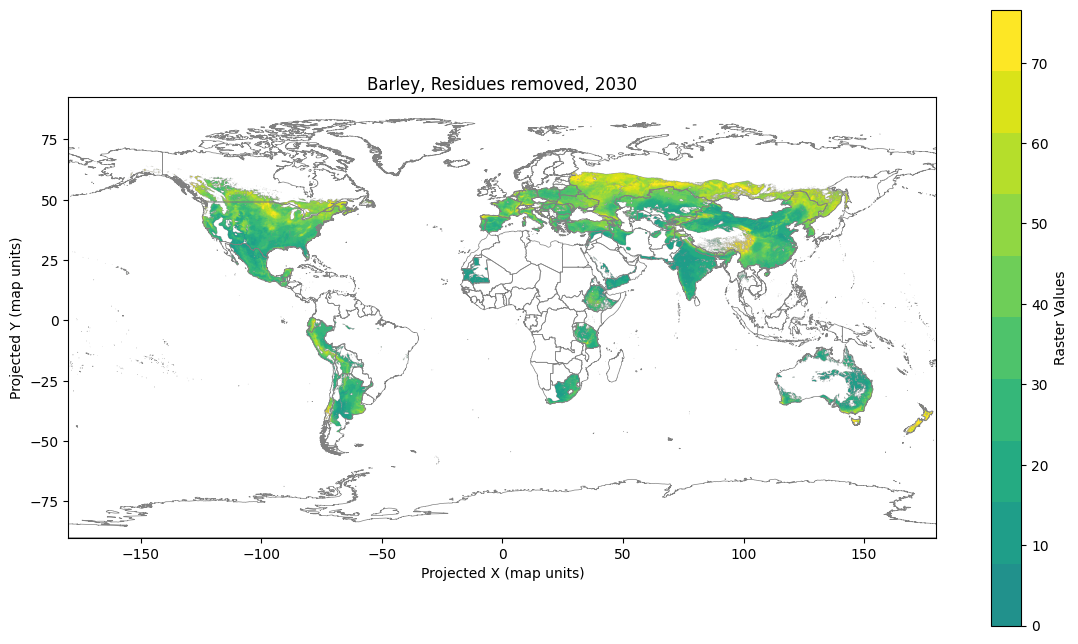

In [13]:
maplot.plot_raster_on_world_extremes_cutoff(results_check_roff_fp, "Barley, Residues removed, 2030", raster_band=15, quantiles = 10, perc_cutoff=1)

Raster has 679,581 unique values. Min: 11.34. Max: 88.19
Using quantiles
All positives route (quantiles)


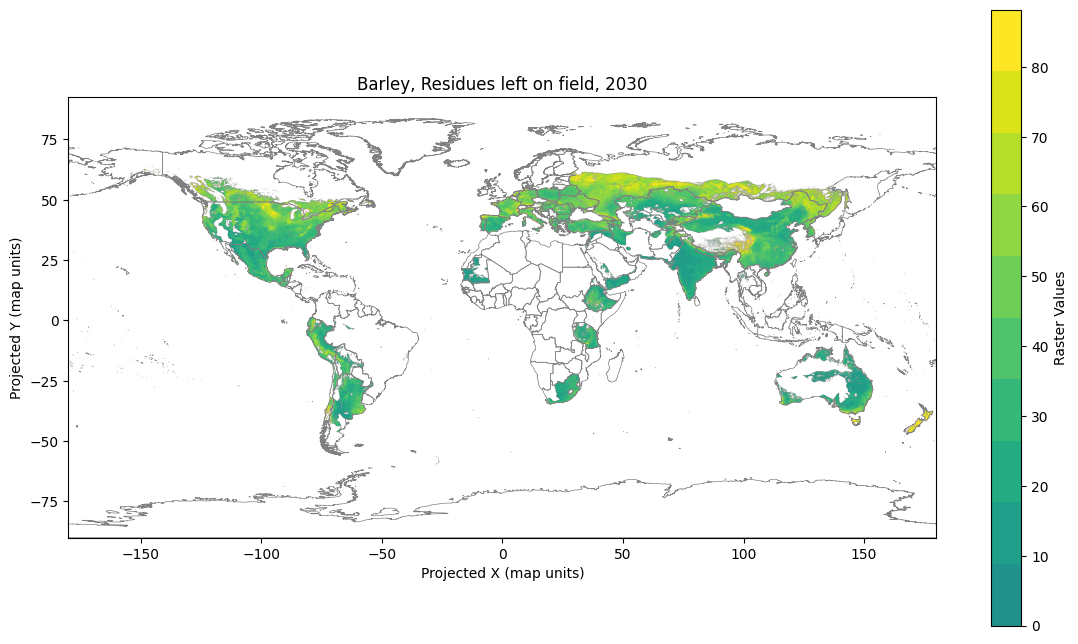

In [ ]:
maplot.plot_raster_on_world_extremes_cutoff(results_check_ron_fp, "Barley, Residues left on field, 2030", raster_band=15, quantiles = 10, perc_cutoff=1)

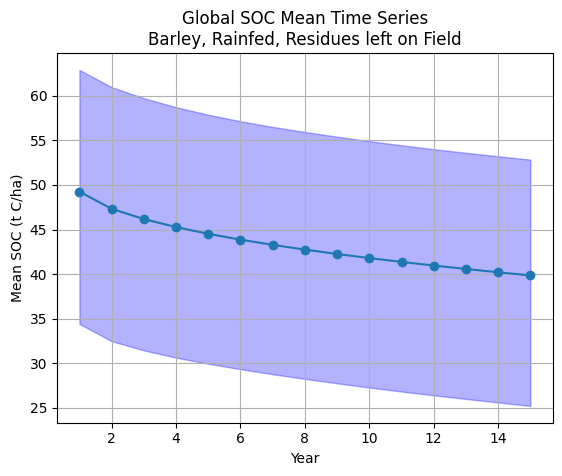

In [16]:
maplot.plot_multiband_raster_timesires(results_check_ron_fp, "Global SOC Mean Time Series\nBarley, Rainfed, Residues left on Field", show_iq=True)

In [17]:
pct_change_ron_fp = rothC.calcuate_annual_perc_changes(results_check_ron_fp)

Raster has 660,347 unique values. Min: -52.00. Max: 42.02
Using quantiles
2-sided route (quantiles)


(<Figure size 1400x800 with 2 Axes>,
 <Axes: title={'center': 'SOC Percentage change by year 2030 for\nBarley, Rainfed, Residues left on Field'}, xlabel='Projected X (map units)', ylabel='Projected Y (map units)'>)

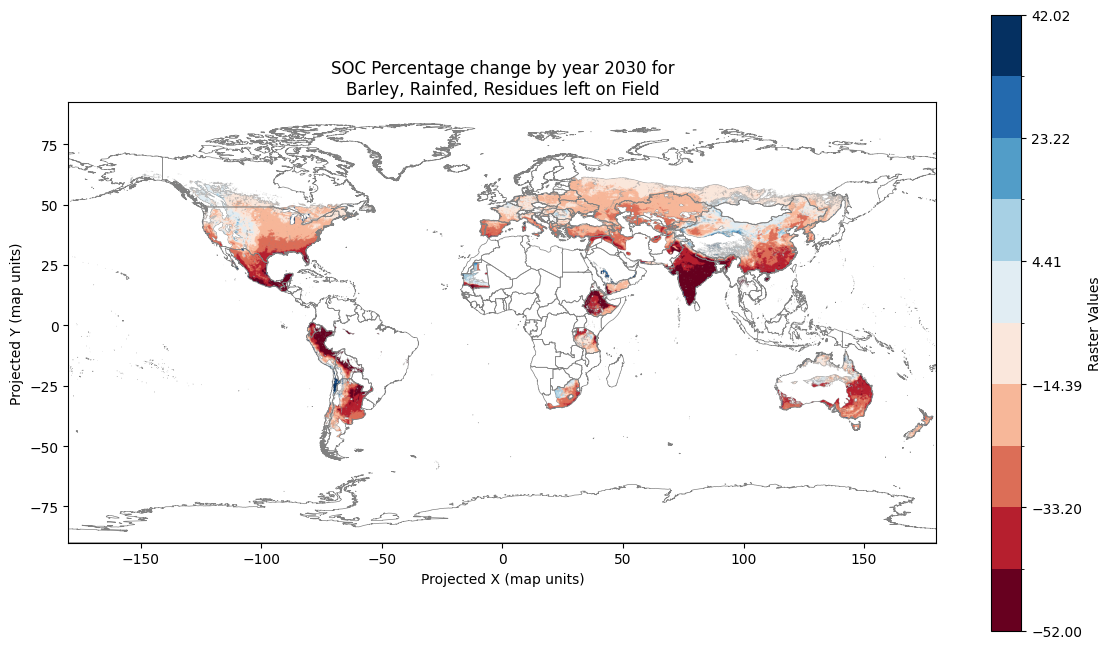

In [ ]:
maplot.plot_da_on_world_extremes_cutoff(pct_change_ron_fp, "SOC Percentage change by year 2030 for\nBarley, Rainfed, Residues left on Field", band=14, cmap="RdBu", quantiles=10, alpha=1)

All results look calculated ok. Continuing with irrigation

In [24]:
rothC.run_rothc_crops_scenarios_from_excel(annual_crop_rothc_irr_scenarios, all_new_files=True, run_test=False)

Could not determine dtype for column 11, falling back to string
Could not determine dtype for column 12, falling back to string


Running Annual crop - Barley - irr_ron
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Barley using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Barley_irr_ron_2030y_SOC.tif
Annual crop - Barley - irr_ron calculated. Continuing...


Running Annual crop - Barley - irr_roff
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Residues removed. C_inputs are 0's


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Barley_irr_roff_2030y_SOC.tif
Annual crop - Barley - irr_roff calculated. Continuing...


Running Annual crop - Cabbage - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Cabbage using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Cabbage_irr_2030y_SOC.tif
Annual crop - Cabbage - irr calculated. Continuing...


Running Annual crop - Carrot - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Carrot using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Carrot_irr_2030y_SOC.tif
Annual crop - Carrot - irr calculated. Continuing...


Running Annual crop - Cotton - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Cotton using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Cotton_irr_2030y_SOC.tif
Annual crop - Cotton - irr calculated. Continuing...


Running Annual crop - Groundnut - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Groundnut using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Groundnut_irr_2030y_SOC.tif
Annual crop - Groundnut - irr calculated. Continuing...


Running Annual crop - Maize - irr_ron
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Maize using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Maize_irr_ron_2030y_SOC.tif
Annual crop - Maize - irr_ron calculated. Continuing...


Running Annual crop - Maize - irr_roff
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Residues removed. C_inputs are 0's


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Maize_irr_roff_2030y_SOC.tif
Annual crop - Maize - irr_roff calculated. Continuing...


Running Annual crop - Onion - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Onion using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Onion_irr_2030y_SOC.tif
Annual crop - Onion - irr calculated. Continuing...


Running Annual crop - Potato - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Potato using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Potato_irr_2030y_SOC.tif
Annual crop - Potato - irr calculated. Continuing...


Running Annual crop - Rapeseed - irr_ron
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Rapeseed using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Rapeseed_irr_ron_2030y_SOC.tif
Annual crop - Rapeseed - irr_ron calculated. Continuing...


Running Annual crop - Rapeseed - irr_roff
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Residues removed. C_inputs are 0's


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Rapeseed_irr_roff_2030y_SOC.tif
Annual crop - Rapeseed - irr_roff calculated. Continuing...


Running Annual crop - Rice - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Rice using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Rice_irr_2030y_SOC.tif
Annual crop - Rice - irr calculated. Continuing...


Running Annual crop - Sorghum - irr_ron
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Sorghum using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Sorghum_irr_ron_2030y_SOC.tif
Annual crop - Sorghum - irr_ron calculated. Continuing...


Running Annual crop - Sorghum - irr_roff
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Residues removed. C_inputs are 0's


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Sorghum_irr_roff_2030y_SOC.tif
Annual crop - Sorghum - irr_roff calculated. Continuing...


Running Annual crop - Soybean - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Soybean using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Soybean_irr_2030y_SOC.tif
Annual crop - Soybean - irr calculated. Continuing...


Running Annual crop - Sugar beet - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Sugar beet using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Sugar beet_irr_2030y_SOC.tif
Annual crop - Sugar beet - irr calculated. Continuing...


Running Annual crop - Sunflower - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Sunflower using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Sunflower_irr_2030y_SOC.tif
Annual crop - Sunflower - irr calculated. Continuing...


Running Annual crop - Sweet potato - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Sweet potato using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Sweet potato_irr_2030y_SOC.tif
Annual crop - Sweet potato - irr calculated. Continuing...


Running Annual crop - Tobacco - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Tobacco using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Tobacco_irr_2030y_SOC.tif
Annual crop - Tobacco - irr calculated. Continuing...


Running Annual crop - Tomato - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Tomato using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Tomato_irr_2030y_SOC.tif
Annual crop - Tomato - irr calculated. Continuing...


Running Annual crop - Wheat - irr_ron
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Calculating baseline residue inputs for annual Wheat using 100 stochastic runs


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Wheat_irr_ron_2030y_SOC.tif
Annual crop - Wheat - irr_ron calculated. Continuing...


Running Annual crop - Wheat - irr_roff
    Loading environmental data...
    Loading crop data...
    Running RothC...
        Residues removed. C_inputs are 0's


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Wheat_irr_roff_2030y_SOC.tif
Annual crop - Wheat - irr_roff calculated. Continuing...




#### 2.1.2. Permanent Crops

In [30]:
permanent_crop_rothc_scenarios_fp = data_path("crops", "rothc_support","permcrops_baseline_rothc_scenarios.xlsx")

In [32]:
importlib.reload(rothC)

<module 'sbtn_leaf.RothC_Raster' from 'C:\\Users\\loyola\\OneDrive - World Wildlife Fund, Inc\\Documents\\203. Python projects\\SBTN_Test\\src\\sbtn_leaf\\RothC_Raster.py'>

In [33]:
# Running scenarios. This takes time!
rothC.run_rothc_crops_scenarios_from_excel(permanent_crop_rothc_scenarios_fp, all_new_files=True)

Could not determine dtype for column 10, falling back to string
Could not determine dtype for column 11, falling back to string


Running Permanent crop - Apple - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Apple_irr_2030y_SOC.tif
Permanent crop - Apple - irr calculated. Continuing...


Running Permanent crop - Banana - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Banana_irr_2030y_SOC.tif
Permanent crop - Banana - irr calculated. Continuing...


Running Permanent crop - Cocoa - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Cocoa_irr_2030y_SOC.tif
Permanent crop - Cocoa - irr calculated. Continuing...


Running Permanent crop - Coconut - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Coconut_irr_2030y_SOC.tif
Permanent crop - Coconut - irr calculated. Continuing...


Running Permanent crop - Coffee - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Coffee_irr_2030y_SOC.tif
Permanent crop - Coffee - irr calculated. Continuing...


Running Permanent crop - Grapes - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Grapes_irr_2030y_SOC.tif
Permanent crop - Grapes - irr calculated. Continuing...


Running Permanent crop - Oil palm - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Oil palm_irr_2030y_SOC.tif
Permanent crop - Oil palm - irr calculated. Continuing...


Running Permanent crop - Olive - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Olive_irr_2030y_SOC.tif
Permanent crop - Olive - irr calculated. Continuing...


Running Permanent crop - Orange - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Orange_irr_2030y_SOC.tif
Permanent crop - Orange - irr calculated. Continuing...


Running Permanent crop - Apple - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Apple_rf_2030y_SOC.tif
Permanent crop - Apple - rf calculated. Continuing...


Running Permanent crop - Banana - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Banana_rf_2030y_SOC.tif
Permanent crop - Banana - rf calculated. Continuing...


Running Permanent crop - Cocoa - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Cocoa_rf_2030y_SOC.tif
Permanent crop - Cocoa - rf calculated. Continuing...


Running Permanent crop - Coconut - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Coconut_rf_2030y_SOC.tif
Permanent crop - Coconut - rf calculated. Continuing...


Running Permanent crop - Coffee - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Coffee_rf_2030y_SOC.tif
Permanent crop - Coffee - rf calculated. Continuing...


Running Permanent crop - Grapes - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Grapes_rf_2030y_SOC.tif
Permanent crop - Grapes - rf calculated. Continuing...


Running Permanent crop - Oil palm - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Oil palm_rf_2030y_SOC.tif
Permanent crop - Oil palm - rf calculated. Continuing...


Running Permanent crop - Olive - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Olive_rf_2030y_SOC.tif
Permanent crop - Olive - rf calculated. Continuing...


Running Permanent crop - Orange - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Orange_rf_2030y_SOC.tif
Permanent crop - Orange - rf calculated. Continuing...


Running Permanent crop - Sugarcane - irr
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Sugarcane_irr_2030y_SOC.tif
Permanent crop - Sugarcane - irr calculated. Continuing...


Running Permanent crop - Sugarcane - rf
    Loading environmental data...
    Loading crop data...
    Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

    RothC results saved into ..\LEAFs\SOC\rasters\Sugarcane_rf_2030y_SOC.tif
Permanent crop - Sugarcane - rf calculated. Continuing...




##### Checking results

In [96]:
apple_irr_results = LEAFs_dir()/"SOC/rasters/Apple_irr_2030y_SOC.tif"
apple_rf_results = LEAFs_dir()/"SOC/rasters/Apple_rf_2030y_SOC.tif"

In [97]:
maplot.inspect_raster(apple_irr_results)

File: C:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\LEAFs\SOC\rasters\Apple_irr_2030y_SOC.tif
Driver: GTiff
Width, Height: 4320, 2083
Number of Bands: 15
CRS: EPSG:4326
Bounds: BoundingBox(left=-179.99999999999997, bottom=-89.99999999999994, right=179.99999999999991, top=83.58333333333331)
Pixel Size: (0.0833333333333333, 0.0833333333333333)
No-data Value: nan

--- Raster Metadata ---
description: RothC model results for year 2030 for Apple, irrigated
long_name: Soil Organic Carbon
model: RothC rasterized vectorized
units: t C/ha
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float32
  Min Value: 7.7331671714782715
  Max Value: 166.87579345703125
  Mean Value: 45.55247116088867
  Standard Deviation: 17.2567138671875

Band 2:
  Data Type: float32
  Min Value: 7.163589954376221
  Max Value: 157.86770629882812
  Mean Value: 42.11054611206055
  Standard Deviation: 16.713592529296875

Band 3:
  Data Type: float32
  Min Valu

In [ ]:
maplot.inspect_raster(apple_rf_results)

File: C:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\LEAFs\SOC\rasters\Apple_rf_2030y_SOC.tif
Driver: GTiff
Width, Height: 4320, 2083
Number of Bands: 15
CRS: EPSG:4326
Bounds: BoundingBox(left=-179.99999999999997, bottom=-89.99999999999994, right=179.99999999999991, top=83.58333333333331)
Pixel Size: (0.0833333333333333, 0.0833333333333333)
No-data Value: nan

--- Raster Metadata ---
description: RothC model results for year 2030
long_name: Soil Organic Carbon
model: RothC rasterized vectorized
units: t C/ha
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float32
  Min Value: 7.7331671714782715
  Max Value: 166.87579345703125
  Mean Value: 45.55051803588867
  Standard Deviation: 17.253765106201172

Band 2:
  Data Type: float32
  Min Value: 9.043563842773438
  Max Value: 158.4442138671875
  Mean Value: 43.507476806640625
  Standard Deviation: 16.481914520263672

Band 3:
  Data Type: float32
  Min Value: 9.753870964050293

Raster has 425,217 unique values. Min: 4.49. Max: 143.77
Using quantiles
All positives route (quantiles)


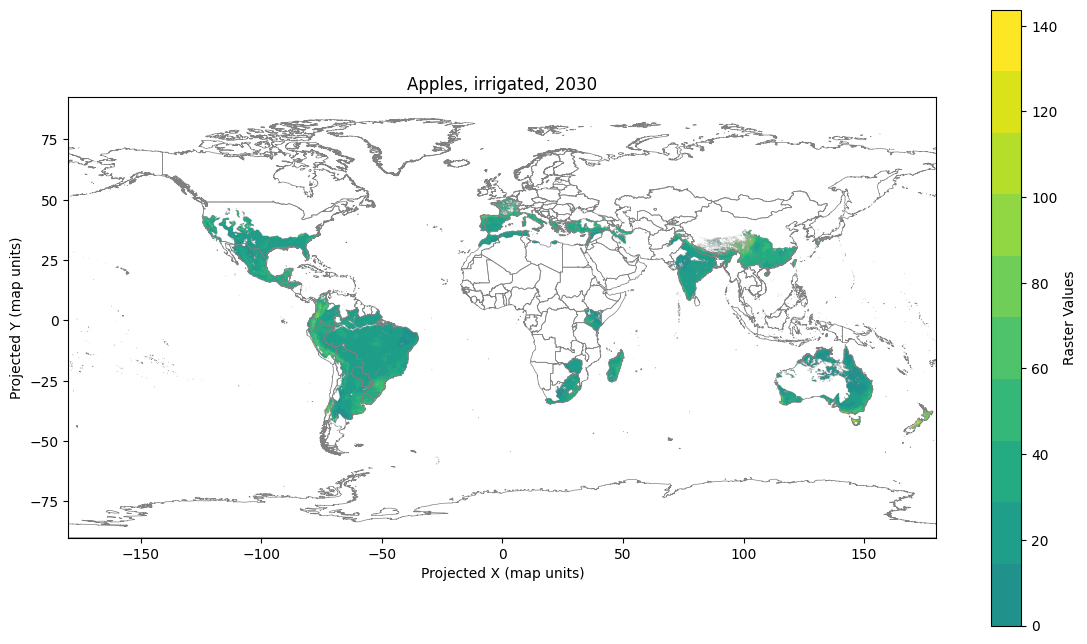

In [98]:
maplot.plot_raster_on_world_extremes_cutoff(apple_irr_results, title="Apples, irrigated, 2030", quantiles=10, raster_band=15, perc_cutoff=0)

Raster has 424,702 unique values. Min: 6.12. Max: 143.77
Using quantiles
All positives route (quantiles)


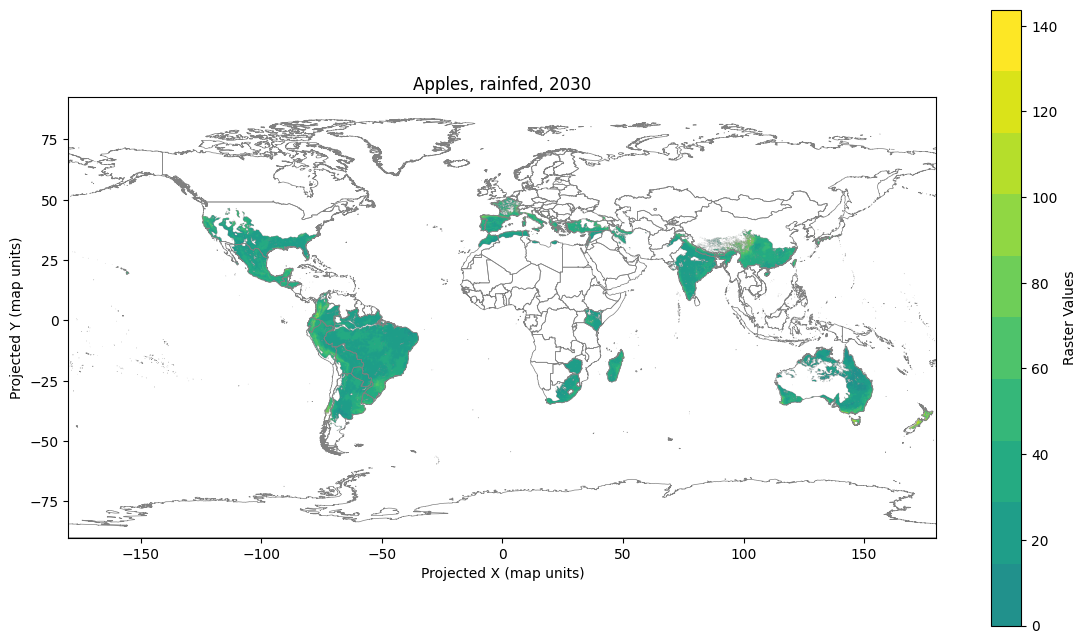

In [100]:
maplot.plot_raster_on_world_extremes_cutoff(apple_rf_results, title="Apples, rainfed, 2030", quantiles=10, raster_band=15, perc_cutoff=0)

Checking other tomatoes too

In [101]:
tomato_rf_raster_fp = "../LEAFs/SOC/rasters/Tomato_rf_2030y_SOC.tif"
tomato_irr_raster_fp = "../LEAFs/SOC/rasters/Tomato_irr_2030y_SOC.tif"

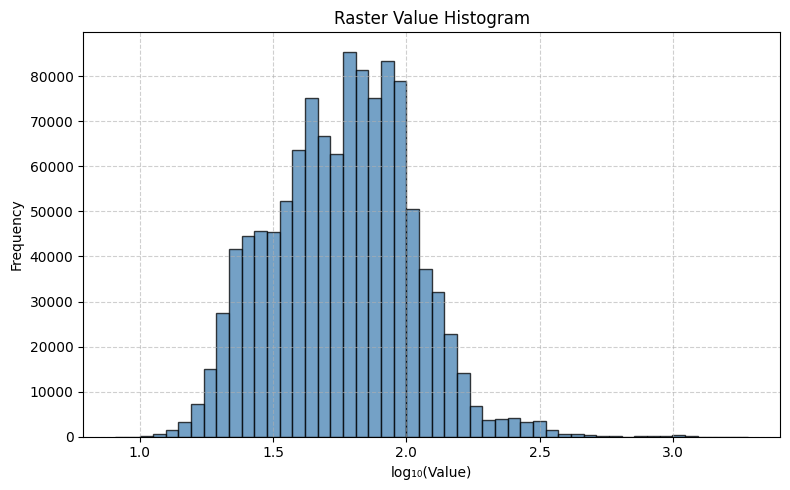

In [ ]:
maplot.plot_raster_histogram(tomato_rf_raster_fp, band=15, mask_zeros=True, log_scale=True)

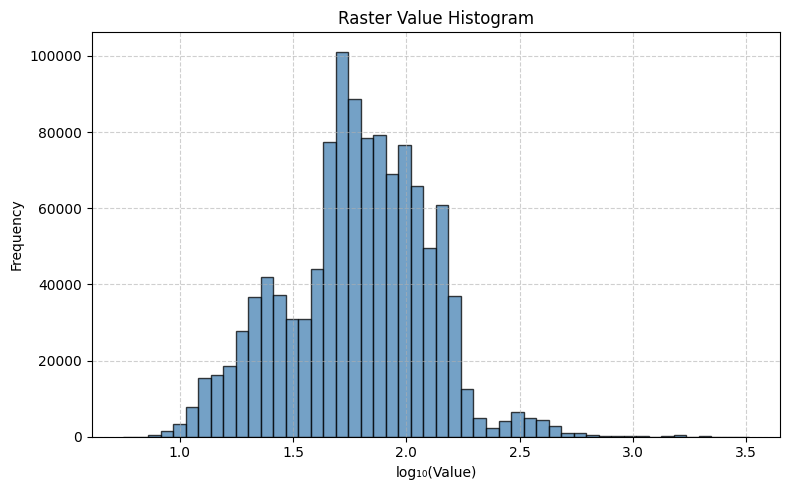

In [ ]:
maplot.plot_raster_histogram(tomato_irr_raster_fp, band=15, mask_zeros=True, log_scale=True)

Checking the yields...

In [ ]:
fao_yields = pl.read_csv("../data/crops/fao_crop_yields_1423.csv", separator=";")
fao_yields_tomatoes = fao_yields.filter(pl.col("Item") == "Tomatoes")

In [ ]:
fao_yields_tomatoes.sort(by="avg_yield_1423").head(10)

Area,Item,Unit,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023,avg_yield_1423,ratio_yield_20_toavg,sd_yields_1423
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Somalia""","""Tomatoes""","""kg/ha""",1438.2,1461.2,1455.8,1453.5,1456.7,1458.5,1456.3,1457.2,1457.3,1456.9,1455.16,0.999217,5.948815
"""Bhutan""","""Tomatoes""","""kg/ha""",3881.2,3511.8,3167.7,2958.8,1958.3,3883.2,3603.5,3111.5,2958.1,3412.6,3244.67,0.900422,536.978521
"""Papua New Guinea""","""Tomatoes""","""kg/ha""",4162.2,4175.2,4099.0,4071.7,4058.4,4036.6,4055.3,4164.8,4085.4,4101.9,4101.05,1.011282,47.411776
"""Togo""","""Tomatoes""","""kg/ha""",4227.8,4242.1,4244.8,4246.5,4243.8,4246.2,4245.5,4245.2,4245.6,4245.4,4243.29,0.999479,5.30084
"""Nigeria""","""Tomatoes""","""kg/ha""",7536.9,7586.2,4147.9,4005.7,3484.9,3436.6,3948.3,3752.7,3609.8,3466.9,4497.59,1.139121,1549.176241
"""Congo""","""Tomatoes""","""kg/ha""",4780.3,4779.1,4764.8,4746.1,4732.9,4706.8,4728.3,4722.5,4719.1,4723.3,4740.32,1.002542,24.729772
"""Timor-Leste""","""Tomatoes""","""kg/ha""",5020.1,5137.9,5160.3,5257.7,5314.3,5328.4,5144.8,5230.6,5216.2,5177.6,5198.79,1.010494,86.838821
"""Djibouti""","""Tomatoes""","""kg/ha""",6193.3,5679.3,5816.6,5962.2,5503.4,5092.9,4982.2,4862.6,4708.5,4554.4,5335.54,1.07092,540.090367
"""Ethiopia""","""Tomatoes""","""kg/ha""",6108.2,6846.5,4503.1,5305.4,5456.3,5812.6,6519.7,4365.2,3881.9,4933.1,5373.2,0.824148,917.64245


In [ ]:
country_gdf = gpd.read_file("../data/CountryLayers/Country_Level0/g2015_2014_0.shp")

In [ ]:
tomato_yields_gdf = country_gdf.merge(fao_yields_tomatoes.to_pandas(), how="left", left_on="ADM0_NAME", right_on="Area")
tomato_yields_gdf = tomato_yields_gdf[["ADM0_NAME","avg_yield_1423", "geometry"]]
tomato_yields_gdf["avg_yield_1423"] = tomato_yields_gdf["avg_yield_1423"]/1000

In [ ]:
tomato_yields_gdf.sort_values(by="avg_yield_1423", ascending=False).head(20)

,ADM0_NAME,avg_yield_1423,geometry
245,Belgium,481.26176,"MULTIPOLYGON (((4.9259 51.4414, 4.92832 51.438..."
208,Sweden,403.53462,"MULTIPOLYGON (((12.82739 55.85452, 12.82255 55..."
217,Finland,388.81208,"MULTIPOLYGON (((22.96127 59.76882, 22.95158 59..."
219,Denmark,372.94022,"MULTIPOLYGON (((11.02427 54.83091, 11.02181 54..."
213,Ireland,359.80000,"MULTIPOLYGON (((-9.46571 51.4524, -9.46665 51...."
206,Norway,344.92687,"MULTIPOLYGON (((7.62775 57.9749, 7.61696 57.96..."
214,Iceland,327.17500,"MULTIPOLYGON (((-20.56648 63.29607, -20.582 63..."
246,Austria,295.68632,"POLYGON ((15.0374 49.01236, 15.04559 49.01129,..."
243,Germany,261.10194,"MULTIPOLYGON (((8.72018 47.69629, 8.72092 47.6..."
244,Switzerland,215.68486,"POLYGON ((8.62885 47.79308, 8.62784 47.78302, ..."


Now loading all tomato SPAM rasters

In [ ]:
tom_spam_a = "../data/crops/spam2020V2r0_global_yield/spam2020_V2r0_global_Y_TOMA_A.tif"
tom_spam_i = "../data/crops/spam2020V2r0_global_yield/spam2020_V2r0_global_Y_TOMA_I.tif"
tom_spam_r = "../data/crops/spam2020V2r0_global_yield/spam2020_V2r0_global_Y_TOMA_R.tif"

Raster has 4,905 unique values. Min: 0.00. Max: 1,108.10
Using quantiles
All positives route (quantiles)


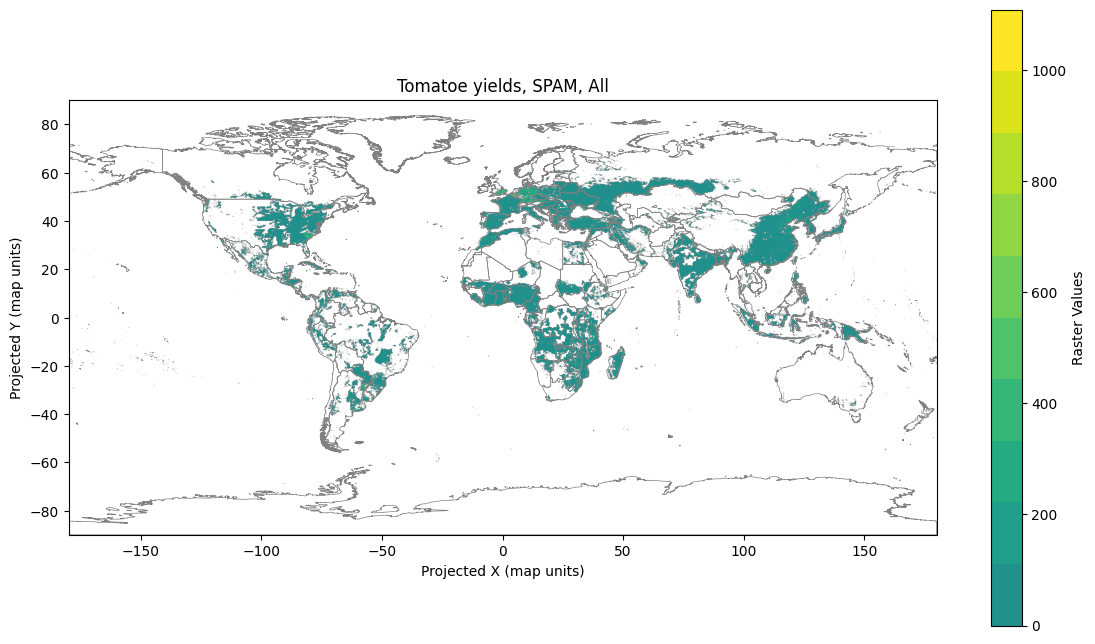

In [ ]:
maplot.plot_raster_on_world_extremes_cutoff(tom_spam_a, "Tomatoe yields, SPAM, All", perc_cutoff=0, quantiles=10)

So it can be seen that the SPAM raster has indeed some extreme values

In [ ]:
tomato_yields_gdf_nordic = tomato_yields_gdf[tomato_yields_gdf["ADM0_NAME"].isin(["Belgium"])]

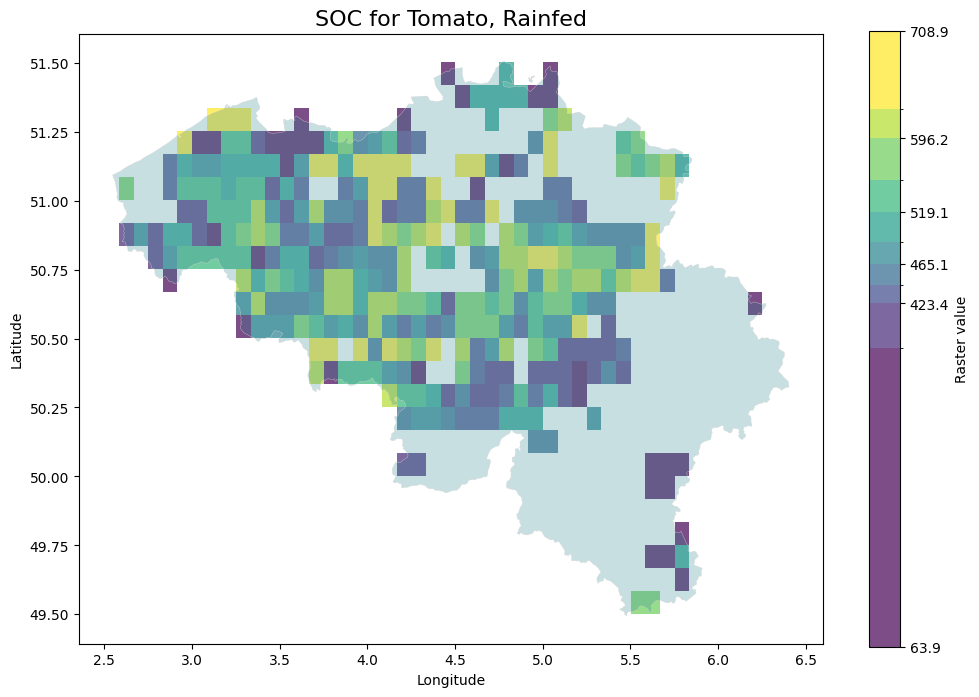

(<Figure size 1200x800 with 2 Axes>,
 <Axes: title={'center': 'SOC for Tomato, Rainfed'}, xlabel='Longitude', ylabel='Latitude'>)

In [ ]:
maplot.plot_raster_over_gdf_showpolygonvalues(tom_spam_r, tomato_yields_gdf_nordic, title="SOC for Tomato, Rainfed",polygon_linewidth=0.25, polygon_value_col="avg_yield_1423", match_color_scale=True, n_quantiles=10, polygon_alpha=.25, band=1)

Checking if the yields distribution of SPAM is similar to SOC outputs

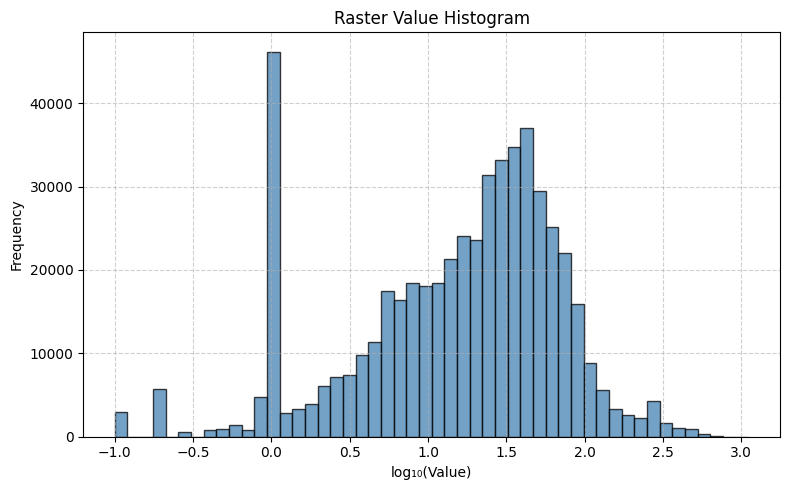

In [108]:
maplot.plot_raster_histogram(tom_spam_a, band=1, mask_zeros=True, log_scale=True)

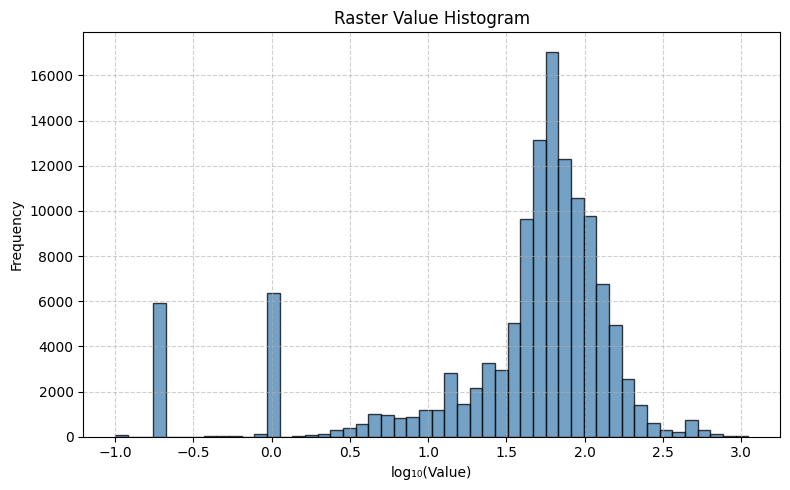

In [107]:
maplot.plot_raster_histogram(tom_spam_i, band=1, mask_zeros=True, log_scale=True)

So there are a few values over 1,000 ton/ha, which are probably outliers.

#### 2.1.3. Forests
All different forest and climate types, as well as the additional input required to run RothC model, have been included in [forest_baseline_rothc_scenarios](../data/forest/forest_baseline_rothc_scenarios.xlsx).


In [3]:
forest_rothc_scenario_fp = data_path("forest", "forest_baseline_rothc_scenarios.xlsx")

In [5]:
# Running scenarios. This takes time!
rothC.run_rothC_forest_scenarios_from_excel(forest_rothc_scenario_fp, force_new_files=False)

Forest - BRDC - Warm temperate dry already exists. Skipping...
Forest - BRDC - Warm temperate moist already exists. Skipping...
Forest - BRDC - Cold temperate dry already exists. Skipping...
Forest - BRDC - Cold temperate moist already exists. Skipping...
Forest - BRDC - Subtropical already exists. Skipping...
Forest - BRDC - Tropical already exists. Skipping...
Forest - BRDC - Boreal dry already exists. Skipping...
Forest - BRDC - Boreal moist already exists. Skipping...
Forest - NEEV - Boreal dry already exists. Skipping...
Forest - NEEV - Boreal moist already exists. Skipping...
Forest - NEEV - Cold temperate dry already exists. Skipping...
Forest - NEEV - Cold temperate moist already exists. Skipping...
Forest - NEEV - Subtropical already exists. Skipping...
Forest - NEEV - Tropical already exists. Skipping...
Running Forest - NEEV - Warm temperate dry
Loading environmental data...
Loading forest data...
Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

Forest - NEEV - Warm temperate dry calculated. Continuing...




Checking some of the results...

In [109]:
forest_soc_result = LEAFs_dir()/"SOC/rasters/BRDC_Warm temperate dry_2030y_SOC.tif"

In [110]:
maplot.inspect_raster(forest_soc_result)

File: C:\Users\loyola\OneDrive - World Wildlife Fund, Inc\Documents\203. Python projects\SBTN_Test\LEAFs\SOC\rasters\BRDC_Warm temperate dry_2030y_SOC.tif
Driver: GTiff
Width, Height: 4320, 2083
Number of Bands: 15
CRS: EPSG:4326
Bounds: BoundingBox(left=-179.99999999999997, bottom=-89.99999999999994, right=179.99999999999991, top=83.58333333333331)
Pixel Size: (0.0833333333333333, 0.0833333333333333)
No-data Value: nan

--- Raster Metadata ---
description: Estimated RothC SOC stock in t C/ha until year 2030 for Broadleaf Deciduous - Cold temperate dry forest type
long_name: Soil Organic Carbon
model: RothC rasterized vectorized
units: t C/ha
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float32
  Min Value: 10.975362777709961
  Max Value: 169.39234924316406
  Mean Value: 58.132720947265625
  Standard Deviation: 18.82948875427246

Band 2:
  Data Type: float32
  Min Value: 11.94847583770752
  Max Value: 166.47434997558594
  Mean Value: 61.274349212646484
  Standard

Raster has 304,273 unique values. Min: 20.35. Max: 189.65
Using quantiles
All positives route (quantiles)


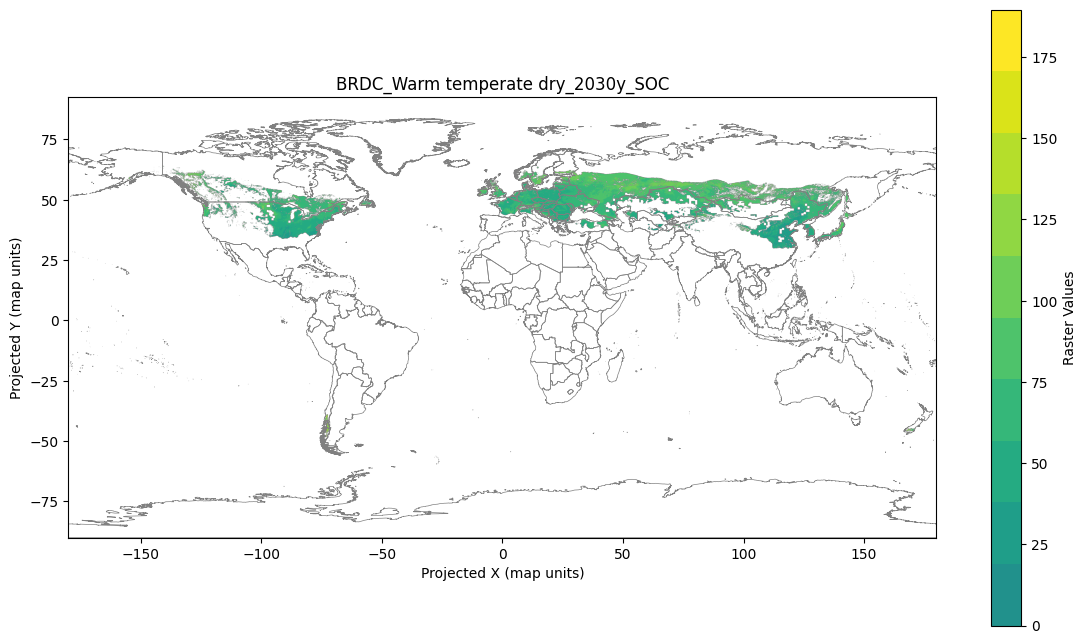

In [111]:
maplot.plot_raster_on_world_extremes_cutoff(forest_soc_result, title="BRDC_Warm temperate dry_2030y_SOC", quantiles=10, raster_band=15, perc_cutoff=0)

Checking the distribution to see if there are outliers

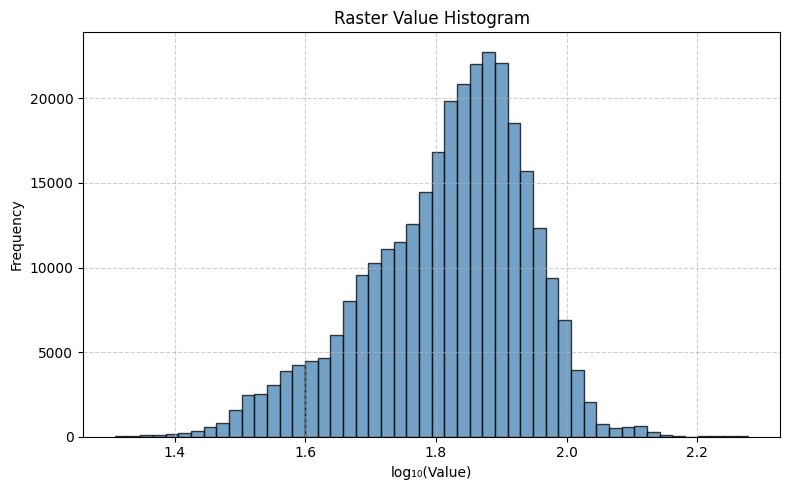

In [112]:
maplot.plot_raster_histogram(forest_soc_result, band=15, mask_zeros=True, log_scale=True)

Looks pretty good, no clear outliers

#### 2.1.4. Grasslands
6 different scenarios have been generated for different combinations of animals present:
    1. Only cattle - average,
    2. Only cattle - high productivity,
    3. Only cattle - low productivity,
    4. Only sheep,
    5. Only goat,
    6. all animals - average productivity.

A csv with all different inputs can be found in [grassland_baseline_rothc_scenarios.csv](../data/grasslands/grassland_baseline_rothc_scenarios.csv). All inputs has been already created.

In [ ]:
# scenario filepaths
forest_rothc_scenario_fp = data_path("grasslands", "grassland_baseline_rothc_scenarios.xlsx")

In [ ]:
# Running scenarios. This takes time!
rothC.run_rothc_grassland_scenarios_from_excel(forest_rothc_scenario_fp, force_new_files=False)

Grassland - natural - sheep already exists. Skipping...
Grassland - natural - goat already exists. Skipping...
Grassland - natural - cattle_avg_sheep_goat already exists. Skipping...
Grassland - natural - cattle_avg already exists. Skipping...
Grassland - natural - cattle_hps already exists. Skipping...
Running Grassland - natural - cattle_lps
Loading environmental data...
Loading natural grassland data...
Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

Grassland - natural - cattle_lps calculated. Continuing...




Plotting some of them...

Raster has 1,203,714 unique values. Min: 22.92. Max: 114.26
Using quantiles
All positives route (quantiles)


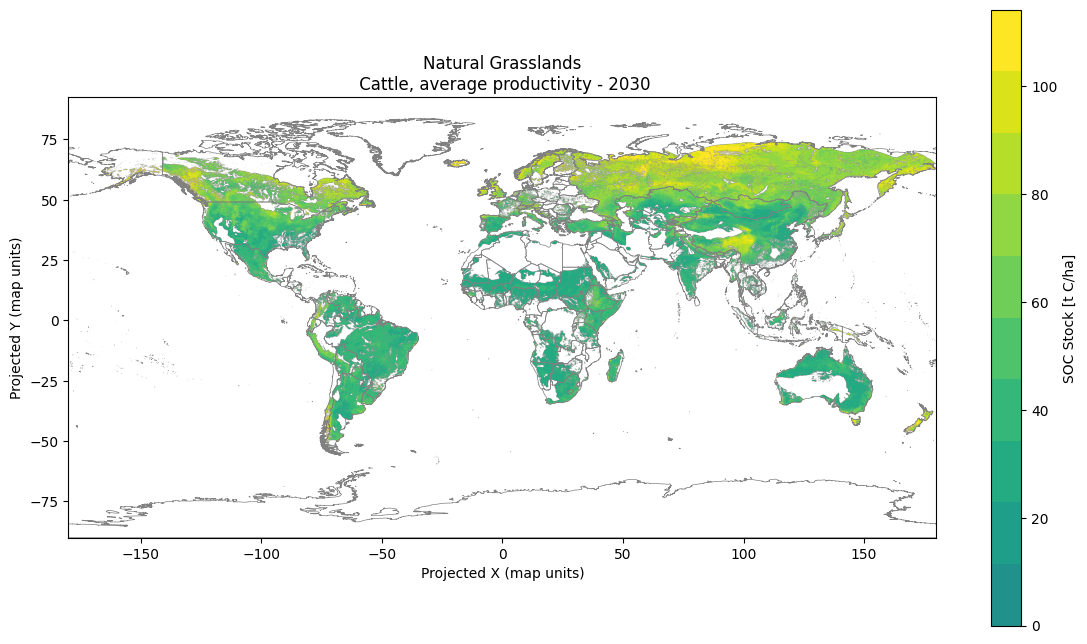

In [ ]:
maplot.plot_raster_on_world_extremes_cutoff("../LEAFs/SOC/rasters/natural_grassland_cattle_avg_2030y_SOC.tif", title="Natural Grasslands\n Cattle, average productivity - 2030", raster_band=15, quantiles=10, label_title="SOC Stock [t C/ha]")

Raster has 1,203,567 unique values. Min: 23.04. Max: 114.28
Using quantiles
All positives route (quantiles)


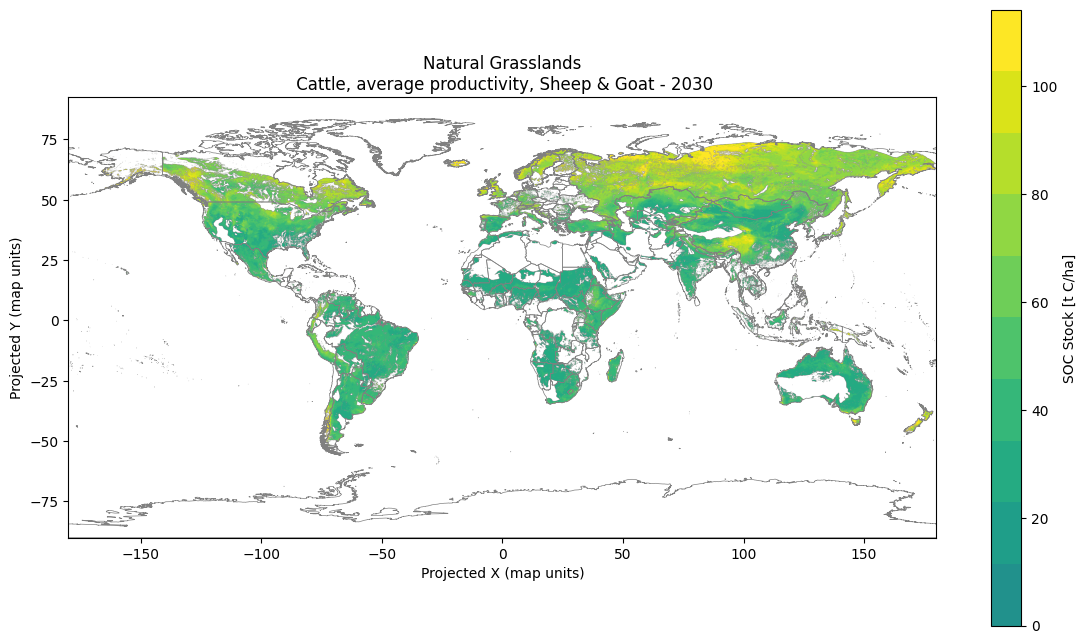

In [ ]:
maplot.plot_raster_on_world_extremes_cutoff("../LEAFs/SOC/rasters/natural_grassland_cattle_avg_sheep_goat_2030y_SOC.tif", title="Natural Grasslands\n Cattle, average productivity, Sheep & Goat - 2030", raster_band=15, quantiles=10, label_title="SOC Stock [t C/ha]")

Checking the distribution

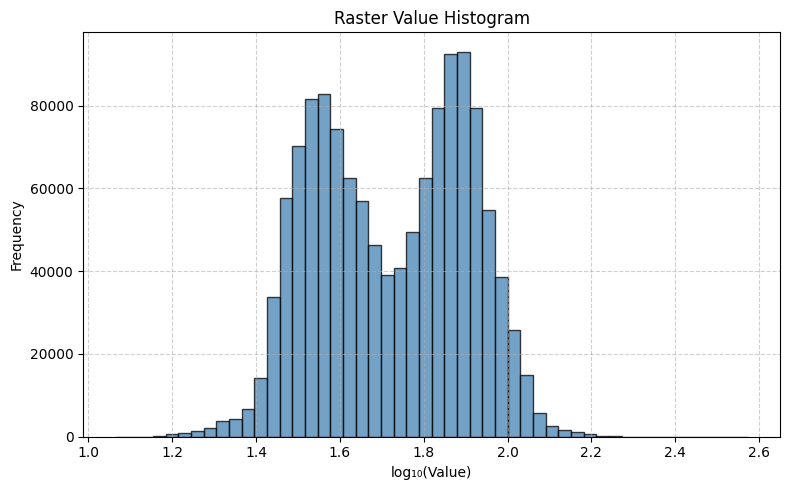

In [113]:
maplot.plot_raster_histogram("../LEAFs/SOC/rasters/natural_grassland_cattle_avg_sheep_goat_2030y_SOC.tif", band=15, mask_zeros=True, log_scale=True)

Looks ok, with 2 clear modes, and now clear outliers

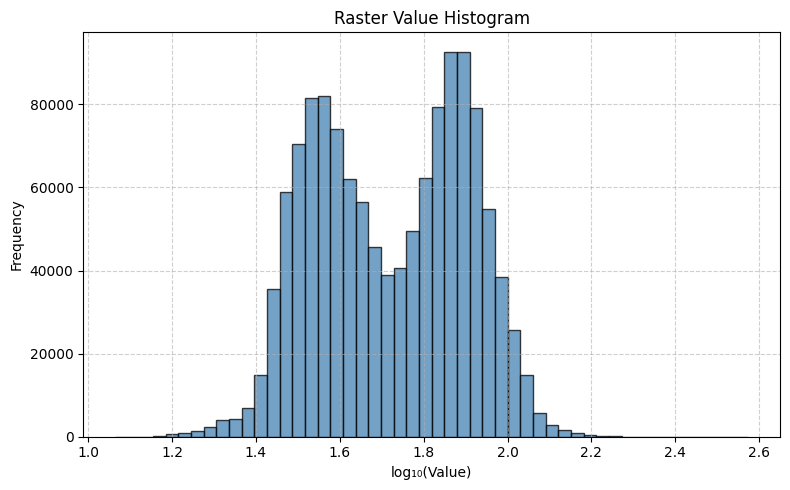

In [114]:
maplot.plot_raster_histogram("../LEAFs/SOC/rasters/natural_grassland_cattle_avg_2030y_SOC.tif", band=15, mask_zeros=True, log_scale=True)

## Step 3 - Country, Sub-Country, and Ecoregion Avearges
After calculating all rasters, the averages can be calculated.

### Country
Starting with countries

In [77]:
importlib.reload(mc)

<module 'sbtn_leaf.map_calculations' from 'C:\\Users\\loyola\\OneDrive - World Wildlife Fund, Inc\\Documents\\203. Python projects\\SBTN_Test\\src\\sbtn_leaf\\map_calculations.py'>

In [4]:
# Inputs that stay the same
input_folder = "../LEAFs/SOC/rasters/"
output_folder = "../LEAFs/SOC/"
cf_name = "SOC_2030"
cf_unit = "t C/ha"
reset_gpck = True

In [5]:
# Inputs that change by area type
area_type = "country"
layer_name = "soc_leaf_country"
corrected_shp = gpd.read_file('../data/CountryLayers/Country_Level0/g2015_2014_0_dissolved.shp')
master_key = "ADM0_NAME"
result_key = "country"

In [ ]:
gpkg_path, df_results = mc.build_cfs_gpkg_from_rasters(
    input_folder =input_folder,
    output_folder = output_folder,
    layer_name=layer_name,
    master_gdf=corrected_shp,   # e.g., countries, subcountries, or ecoregions
    master_key=master_key,            # or 'ISO_A3', 'ADM1_NAME', 'ECO_NAME'
    result_key=result_key,              # must match the column emitted by your calc gdf
    input_raster_key_startswith=None,
    cf_name=cf_name,
    cf_unit=cf_unit,
    area_type=area_type,
    calc_kwargs=dict(raster_band = 15, outlier_method="log1p_win", std_thresh = 3),     # Chooses the raster band. Due to outliers in crops, setting it to windsorize, replacing all values above 3 stds with mean + 3 stds.
    reset_gpkg=reset_gpck,
    run_test=False                             # Use run test to run the first 3 files
)

print(f"Wrote {df_results.shape[0]} rows into {gpkg_path}")

2025-11-26 11:31:32,932 - INFO - Building 'soc_leaf_country' from rasters in ../LEAFs/SOC/rasters/ into ../LEAFs/SOC/ (../LEAFs/SOC/SOC_2030_country.gpkg)



Processing rasters (soc_leaf_country):   0%|          | 0/82 [00:00<?, ?raster/s]

2025-11-26 11:31:46,066 - INFO - Calculating SOC_2030 for Apple_irr_2030y_SOC...
Calculating SOC_2030 for Apple_irr_2030y_SOC...
2025-11-26 11:34:06,742 - INFO - Calculating SOC_2030 for Apple_rf_2030y_SOC...
Calculating SOC_2030 for Apple_rf_2030y_SOC...
2025-11-26 11:36:04,990 - INFO - Calculating SOC_2030 for BRDC_Boreal dry_2030y_SOC...
Calculating SOC_2030 for BRDC_Boreal dry_2030y_SOC...
2025-11-26 11:38:22,991 - INFO - Calculating SOC_2030 for BRDC_Boreal moist_2030y_SOC...
Calculating SOC_2030 for BRDC_Boreal moist_2030y_SOC...
2025-11-26 11:42:01,760 - INFO - Calculating SOC_2030 for BRDC_Cold temperate dry_2030y_SOC...
Calculating SOC_2030 for BRDC_Cold temperate dry_2030y_SOC...
2025-11-26 11:45:49,685 - INFO - Calculating SOC_2030 for BRDC_Cold temperate moist_2030y_SOC...
Calculating SOC_2030 for BRDC_Cold temperate moist_2030y_SOC...
2025-11-26 11:48:49,515 - INFO - Calculating SOC_2030 for BRDC_Subtropical_2030y_SOC...
Calculating SOC_2030 for BRDC_Subtropical_2030y_SOC.

Wrote 68010 rows into ../LEAFs/SOC/SOC_2030_country.gpkg


Checking outputs

In [8]:
gpkg_path = "../LEAFs/SOC/SOC_2030_country.gpkg"

In [9]:
gdf_test_values = gpd.read_file(gpkg_path, layer=layer_name)
gdf_test_values.sort_values(by=["cf"]).head()

,ADM0_NAME,flow_name,cf,cf_median,cf_std,_source_file
8556,United Arab Emirates,Maize_irr_roff_2030y_SOC,6.245543,6.245543,0.000000,Maize_irr_roff_2030y_SOC.tif
3576,United Arab Emirates,Barley_irr_roff_2030y_SOC,6.278253,6.278253,0.000000,Barley_irr_roff_2030y_SOC.tif
15353,Ma'tan al-Sarra,Sorghum_irr_roff_2030y_SOC,6.412316,6.399345,0.318216,Sorghum_irr_roff_2030y_SOC.tif
15323,Iran (Islamic Republic of),Sorghum_irr_roff_2030y_SOC,6.450605,6.523183,0.322636,Sorghum_irr_roff_2030y_SOC.tif
15476,Western Sahara,Sorghum_irr_roff_2030y_SOC,6.591035,6.213234,1.009174,Sorghum_irr_roff_2030y_SOC.tif


And it can be seen that the output has all values. Opening the dataset it can be seen it include NaNs.

To plot it, the geoemtries layer need to be imported as:

In [10]:
gdf_test_geometries = gpd.read_file(gpkg_path, layer="geometry_layer")

And then merged.

In [11]:
gdf_test = gdf_test_geometries.merge(gdf_test_values.drop(columns="_source_file"), how="left", on="ADM0_NAME")

Plotting Tomatoes

In [12]:
Tomato_irr = gdf_test[gdf_test["flow_name"]=="Tomato_irr_2030y_SOC"]

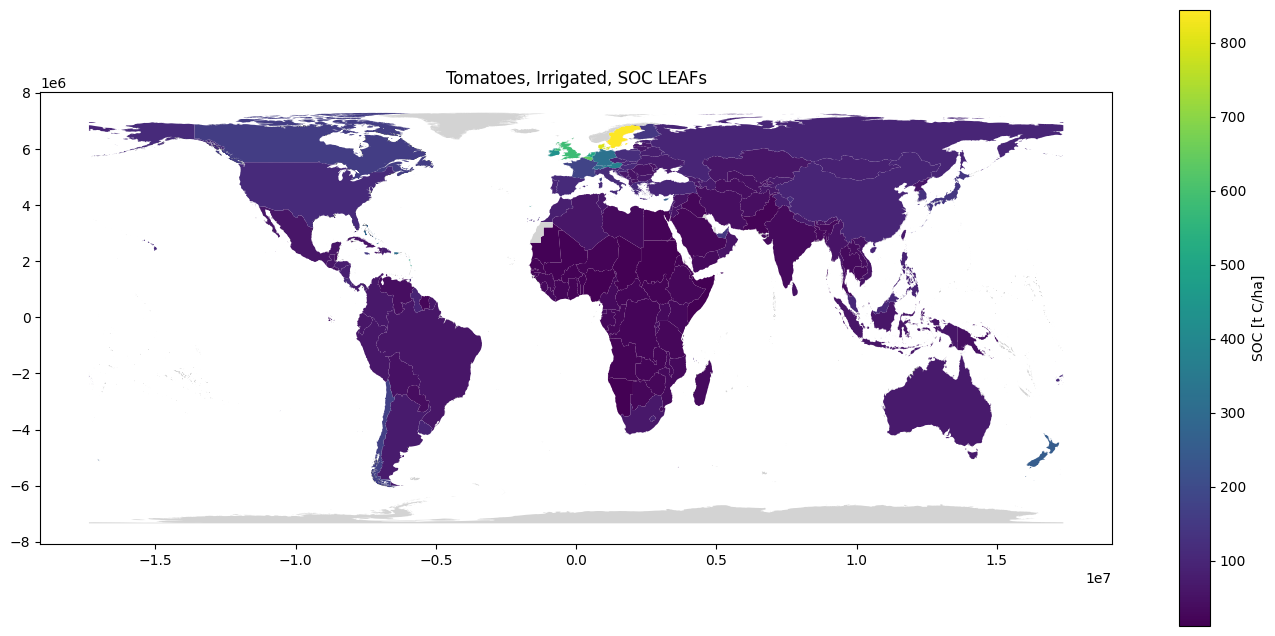

In [13]:
fig, ax = plt.subplots(figsize=(14, 8)) 
Tomato_irr.plot(column="cf", ax=ax, cmap="viridis", 
           legend=True, 
           legend_kwds={"label": "SOC [t C/ha]", "shrink": 0.8}, 
           missing_kwds={"color": "lightgrey", "label": "No value"}) 

ax.set_title("Tomatoes, Irrigated, SOC LEAFs")
plt.tight_layout() 
plt.show()

Checking df

In [95]:
df_results.sort_values(by="value", ascending=False).head(10)

,ADM0_NAME,country,value,metric,flow_name
58277,Sweden,Sweden,843.915360,cf_mean,Tomato_irr_2030y_SOC
58107,Denmark,Denmark,795.976900,cf_mean,Tomato_irr_2030y_SOC
28600,Iceland,Iceland,765.638306,cf_median,NEEV_Boreal moist_2030y_SOC
28324,Iceland,Iceland,757.905534,cf_mean,NEEV_Boreal moist_2030y_SOC
28472,United States of America,United States of America,703.255689,cf_mean,NEEV_Boreal moist_2030y_SOC
28748,United States of America,United States of America,696.835938,cf_median,NEEV_Boreal moist_2030y_SOC
2881,Iceland,Iceland,694.697693,cf_median,BRDC_Boreal moist_2030y_SOC
2605,Iceland,Iceland,688.893612,cf_mean,BRDC_Boreal moist_2030y_SOC
28691,Russian Federation,Russian Federation,683.818787,cf_median,NEEV_Boreal moist_2030y_SOC
28415,Russian Federation,Russian Federation,673.903209,cf_mean,NEEV_Boreal moist_2030y_SOC
